# Walk vs Run in Rain

In [67]:
import numpy as np
import matplotlib.pyplot as plt

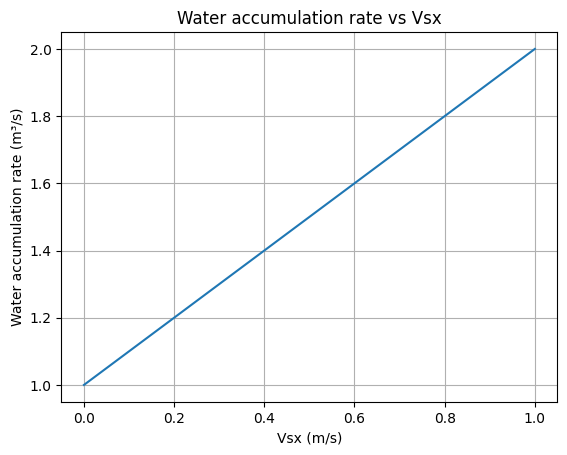

In [68]:
# Rain fall velocity
Vrx = 0 #m/s
Vry = -1 #m/s
Vrz = 0 #m/s

# Subject velocity
Vsx = 0 #m/s
Vsy = 0 #m/s
Vsz = 0 #m/s

# Subject dimension
Lx_in = 1 #m
Ly = 1 #m
Lz = 1 #m

def calculate_water_accumulation(Lx, Ly, Lz, Vrx, Vry, Vrz, Vsx, Vsy, Vsz):
    """
    Calculate the water accumulation rate when a subject moves through rain.
    
    Parameters:
    -----------
    Lx, Ly, Lz : float
        Subject dimensions in meters (m)
    Vrx, Vry, Vrz : float
        Rain velocity components in meters per second (m/s)
    Vsx, Vsy, Vsz : float
        Subject velocity components in meters per second (m/s)
    
    Returns:
    --------
    tuple
        Water accumulation rates (x, y, z, total) in cubic meters per second (m³/s)
    """
    # Calculate water accumulation rate in each direction
    water_accum_x = np.abs((Lx * Lz) * (Vrx - Vsx))  # m³/s
    water_accum_y = np.abs((Ly * Lz) * (Vry - Vsy))  # m³/s
    water_accum_z = np.abs((Lx * Ly) * (Vrz - Vsz))  # m³/s
    
    # Calculate total water accumulation rate
    total_water_accum = water_accum_x + water_accum_y + water_accum_z  # m³/s
    
    return total_water_accum

# plot the total water accumulated with different Vsx
Vsx = np.linspace(0, 1, 10)
Vsx_water_accum = calculate_water_accumulation(Lx_in, Ly, Lz, Vrx, Vry, Vrz, Vsx, Vsy, Vsz)
plt.plot(Vsx, Vsx_water_accum)
plt.xlabel('Vsx (m/s)')
plt.ylabel('Water accumulation rate (m³/s)')
plt.title('Water accumulation rate vs Vsx')
plt.grid()
plt.show()

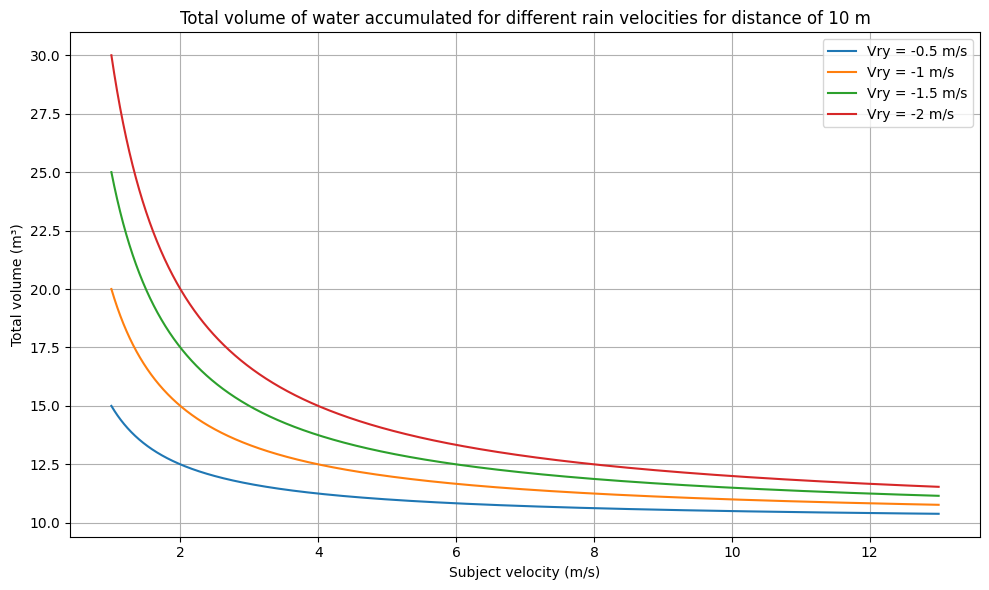

In [69]:
ld = 10  # m
lx = 1  # m
ly = 1  # m
lz = 1  # m

Vsx = np.linspace(1, 13, 10000)
Vry_values = [-0.5, -1, -1.5, -2]  # Different rain velocities to plot

plt.figure(figsize=(10, 6))
plt.title(f'Total volume of water accumulated for different rain velocities for distance of {ld} m')
plt.ylabel('Total volume (m³)')
plt.xlabel('Subject velocity (m/s)')

for Vry in Vry_values:
    volume_rate = np.abs((lx * lz) * (- Vsx)) + np.abs((ly * lz *Vry))  # m³/s
    total_volume = volume_rate * ld / Vsx  # m³
    plt.plot(Vsx, total_volume, label=f'Vry = {Vry} m/s')

plt.grid()
plt.legend()
plt.tight_layout()

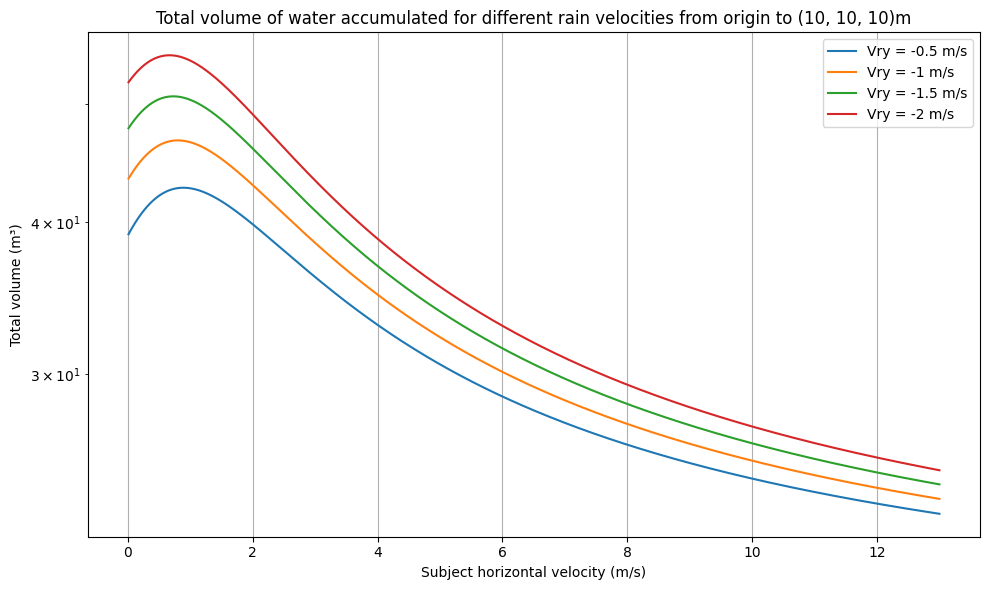

In [71]:
# positive x direction is from left to right
# positive y direction is from bottom to top
# positive z direction is from back to front

# Rain fall velocity
Vrx = -1 #m/s
Vry = -3 #m/s
Vrz = -1 #m/s

# Subject velocity
Vsx = 1 #m/s
Vsy = 0.002 #m/s
Vsz = 2 #m/s

# Subject dimension
Lx = 1 #m
Ly = 1 #m
Lz = 1 #m

# distance
ldx = 10  # m
ldy = 10  # m
ldz = 10  # m

def calculate_water_accumulation(Lx_in, Ly_in, Lz_in, Vrx_in, Vry_in, Vrz_in, Vsx_in, Vsy_in, Vsz_in, ldx_in, ldy_in, ldz_in):
    """
    Calculate the water accumulation rate when a subject moves through rain.
    
    Parameters:
    -----------
    Lx_in, Ly_in, Lz_in : float
        Subject dimensions in meters (m)
    Vrx_in, Vry_in, Vrz_in : float
        Rain velocity components in meters per second (m/s)
    Vsx_in, Vsy_in, Vsz_in : float
        Subject velocity components in meters per second (m/s)
    ldx_in, ldy_in, ldz_in : float
        Distance in meters (m)
    
    Returns:
    --------
    float
        Water accumulation total in cubic meters(m³)
    """
    # Check for zero velocity in any direction with nonzero distance
    if (ldx != 0 and np.any(Vsx == 0)) or (ldy != 0 and np.any(Vsy == 0)) or (ldz != 0 and np.any(Vsz == 0)):
        raise ValueError("Velocity in a direction cannot be zero if distance in that direction is nonzero (would take infinite time).")
    
    # Calculate water accumulation rate in each direction
    water_accum_rate_x = np.abs((Lx_in * Lz_in) * (Vrx_in - Vsx_in))  # m³/s
    water_accum_rate_y = np.abs((Ly_in * Lz_in) * (Vry_in - Vsy_in))  # m³/s
    water_accum_rate_z = np.abs((Lx_in * Ly_in) * (Vrz_in - Vsz_in))  # m³/s

    distance = np.sqrt(ldx_in**2 + ldy_in**2 + ldz_in**2)
    velocity = np.sqrt(Vsx_in**2 + Vsy_in**2 + Vsz_in**2)
    if np.any(velocity == 0):
        raise ValueError("Total velocity cannot be zero (would take infinite time).")
    time = distance / velocity  # seconds

    water_accum_x = water_accum_rate_x * time  # m³
    water_accum_y = water_accum_rate_y * time  # m³
    water_accum_z = water_accum_rate_z * time  # m³
    
    # Calculate total water accumulation rate
    total_water_accum = water_accum_x + water_accum_y + water_accum_z  # m^3
    
    return total_water_accum

Vsx = np.linspace(0.01, 13, 10000)
Vry_values = [-0.5, -1, -1.5, -2]  # Different rain velocities to plot

plt.figure(figsize=(10, 6))
plt.title(f'Total volume of water accumulated for different rain velocities from origin to ({ldx}, {ldy}, {ldz})m')
plt.ylabel('Total volume (m³)')
plt.xlabel('Subject horizontal velocity (m/s)')

for Vry in Vry_values:
    total_volume = calculate_water_accumulation(Lx, Ly, Lz, Vrx, Vry, Vrz, Vsx, Vsy, Vsz, ldx, ldy, ldz)
    # m³
    plt.semilogy(Vsx, total_volume, label=f'Vry = {Vry} m/s')

plt.grid()
plt.legend()
plt.tight_layout()

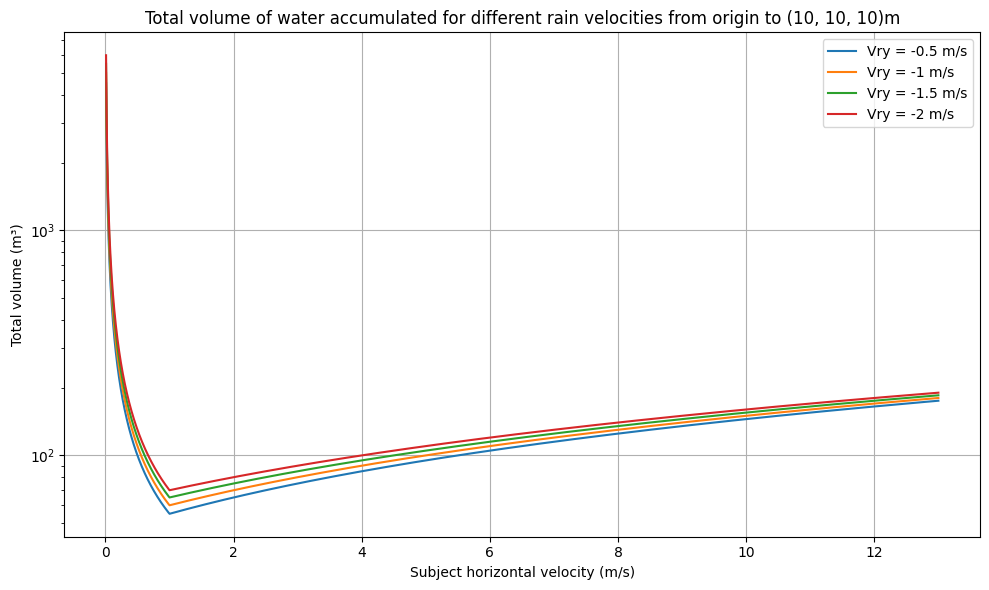

In [85]:
# positive x direction is from left to right
# positive y direction is from bottom to top
# positive z direction is from back to front

# Rain fall velocity
Vrx = -1 #m/s
Vry = -3 #m/s
Vrz = -1 #m/s

# Subject velocity
Vsx = 1 #m/s
Vsy = 1 #m/s
Vsz = 1 #m/s

# Subject dimension
Lx = 1 #m
Ly = 1 #m
Lz = 1 #m

# distance
ldx = 10  # m
ldy = 10  # m
ldz = 10  # m

def calculate_water_accumulation(Lx_in, Ly_in, Lz_in, Vrx_in, Vry_in, Vrz_in, Vsx_in, Vsy_in, Vsz_in, ldx_in, ldy_in, ldz_in):
    """
    Calculate the water accumulation rate when a subject moves through rain.
    
    Parameters:
    -----------
    Lx_in, Ly_in, Lz_in : float
        Subject dimensions in meters (m)
    Vrx_in, Vry_in, Vrz_in : float
        Rain velocity components in meters per second (m/s)
    Vsx_in, Vsy_in, Vsz_in : float
        Subject velocity components in meters per second (m/s)
    ldx_in, ldy_in, ldz_in : float
        Distance in meters (m)
    
    Returns:
    --------
    float
        Water accumulation total in cubic meters(m³)
    """
    # Calculate water accumulation rate in each direction
    water_accum_rate_x = np.abs((Lx_in * Lz_in) * (Vrx_in - Vsx_in))  # m³/s
    water_accum_rate_y = np.abs((Ly_in * Lz_in) * (Vry_in - Vsy_in))  # m³/s
    water_accum_rate_z = np.abs((Lx_in * Ly_in) * (Vrz_in - Vsz_in))  # m³/s

    time_x = ldx_in/Vsx_in if Vsx_in != 0 else np.inf if ldx_in != 0 else 0
    time_y = ldy_in/Vsy_in if Vsy_in != 0 else np.inf if ldy_in != 0 else 0
    time_z = ldz_in/Vsz_in if Vsz_in != 0 else np.inf if ldz_in != 0 else 0
    
    time = max(time_x, time_y, time_z)  # seconds

    water_accum_x = water_accum_rate_x * time  # m³
    water_accum_y = water_accum_rate_y * time  # m³
    water_accum_z = water_accum_rate_z * time  # m³
    
    # Calculate total water accumulation rate
    total_water_accum = water_accum_x + water_accum_y + water_accum_z  # m^3
    
    return total_water_accum

Vsx_array = np.linspace(0.01, 13, 10000)
Vry_values = [-0.5, -1, -1.5, -2]  # Different rain velocities to plot

plt.figure(figsize=(10, 6))
plt.title(f'Total volume of water accumulated for different rain velocities from origin to ({ldx}, {ldy}, {ldz})m')
plt.ylabel('Total volume (m³)')
plt.xlabel('Subject horizontal velocity (m/s)')

for Vry in Vry_values:
    water_accum = []
    for Vsx in Vsx_array:
        total_volume = calculate_water_accumulation(Lx, Ly, Lz, Vrx, Vry, Vrz, Vsx, Vsy, Vsz, ldx, ldy, ldz)
        water_accum.append(total_volume)

    water_accum = np.array(water_accum)
    plt.semilogy(Vsx_array, water_accum, label=f'Vry = {Vry} m/s')

plt.grid()
plt.legend()
plt.tight_layout()

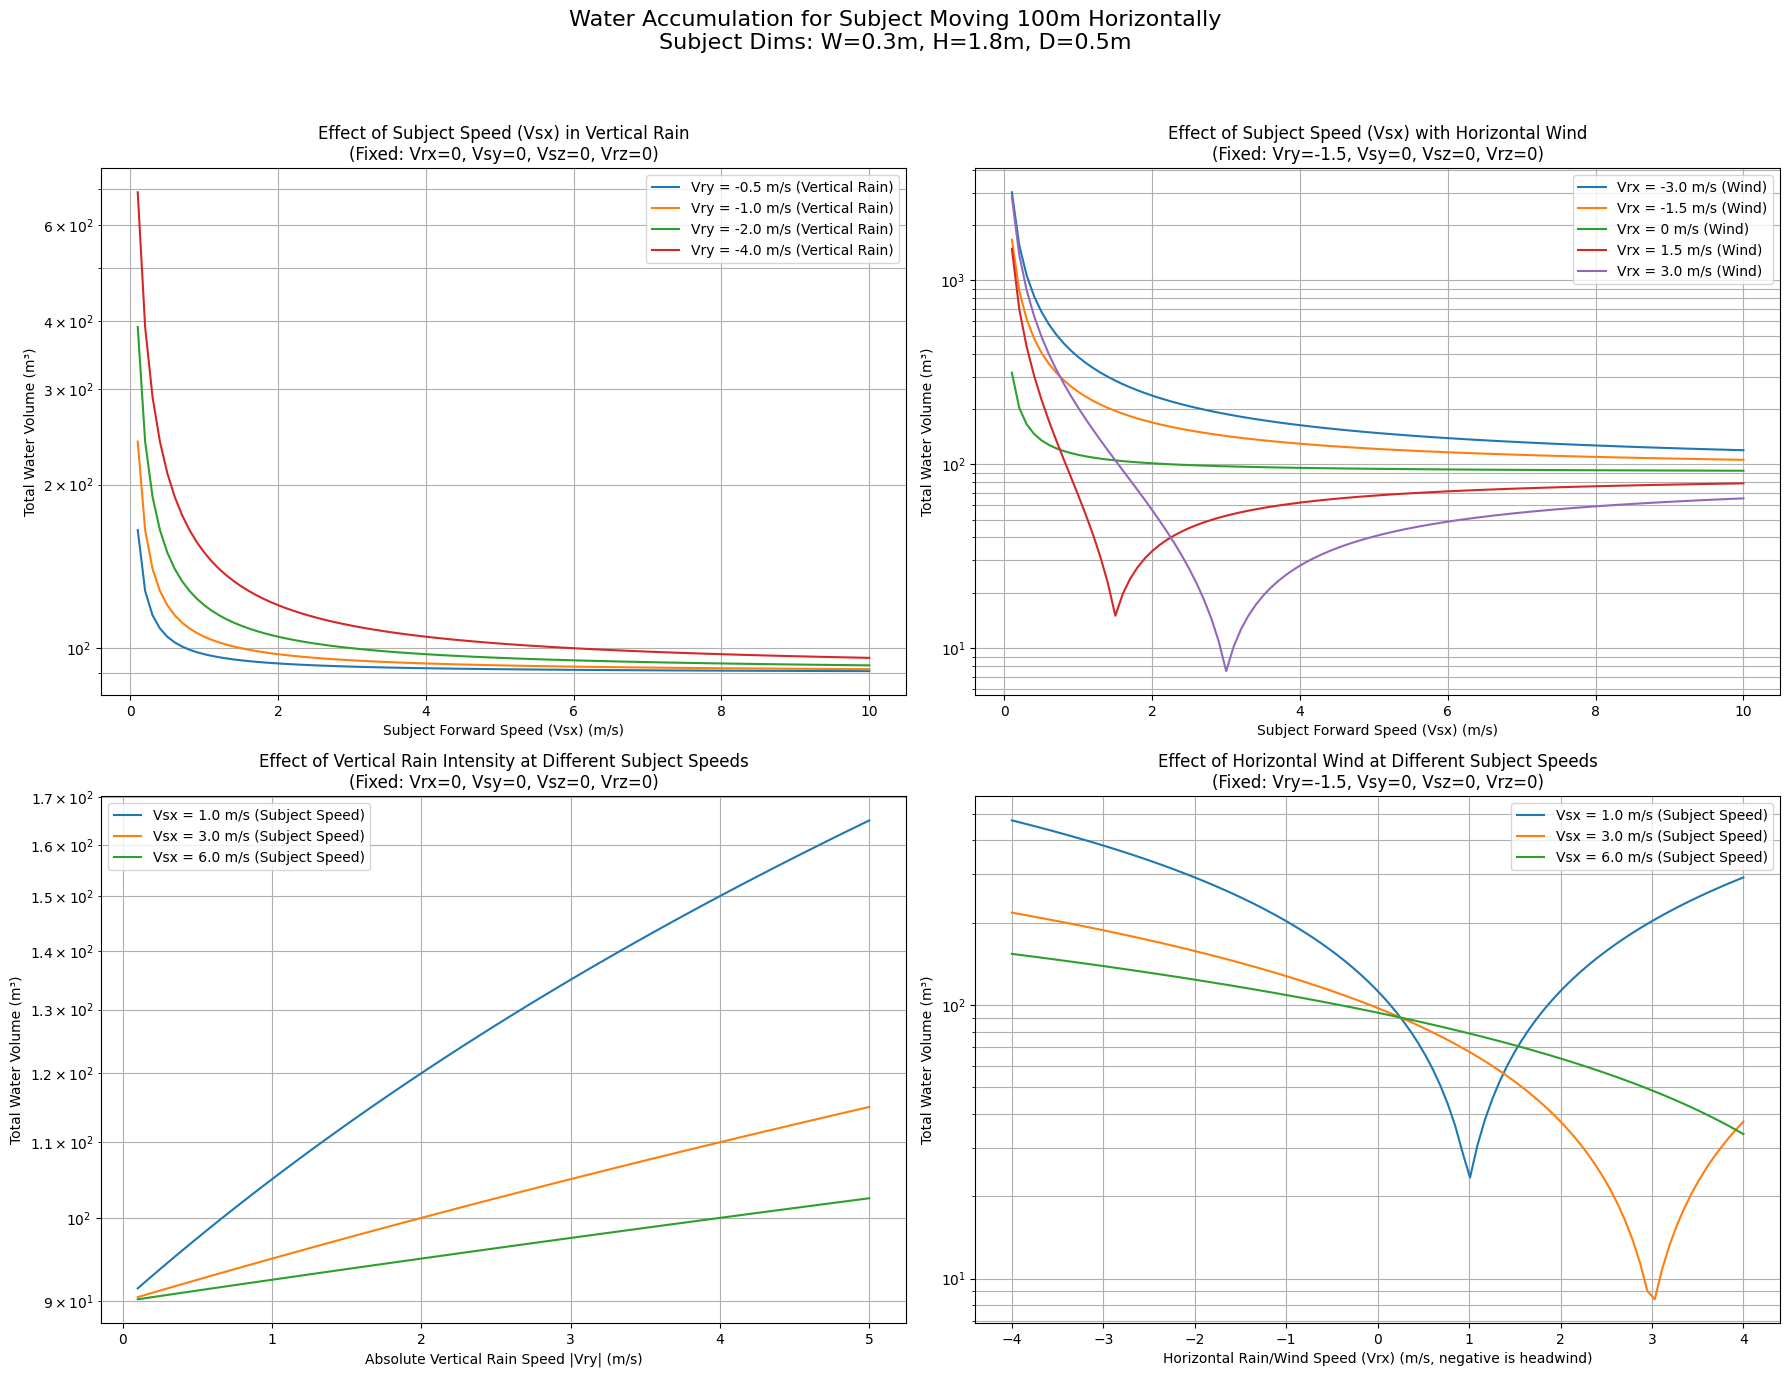

In [88]:
# positive x direction is from left to right
# positive y direction is from bottom to top
# positive z direction is from back to front
import numpy as np
import matplotlib.pyplot as plt

# --- Simplified Scenario Parameters ---
# Subject dimension (more realistic depth)
Lx = 0.3 #m (width)
Ly = 1.8 #m (height)
Lz = 0.5 #m (depth/thickness)

# Distance to travel
ldx = 100  # m (primary travel distance along x-axis)
ldy = 0    # m (no net displacement in y)
ldz = 0    # m (no net displacement in z)

# Fixed Subject Velocities for this simplified scenario
Vsy_subject_fixed = 0 # m/s (no vertical movement of subject)
Vsz_subject_fixed = 0 # m/s (no sideways movement of subject)

# Fixed Rain Velocities for this simplified scenario
Vrz_rain_fixed = 0    # m/s (no sideways rain/wind)

# --- Arrays for Plotting ---
points_count = 100

# Array for varying subject's forward speed (Vsx)
Vsx_subject_array = np.linspace(0.1, 10, points_count) # From 0.1 m/s (slow walk) to 10 m/s (sprint)

# Lists of rain component values for iteration (lines on plots)
Vry_rain_iter_list = [-0.5, -1.0, -2.0, -4.0]  # Vertical rain speeds (light to heavy, negative is downwards)
Vrx_rain_iter_list = [-3.0, -1.5, 0, 1.5, 3.0] # Horizontal rain speeds (negative=headwind, 0=no wind, positive=tailwind)

# Arrays for varying rain conditions on x-axes for plots 3 & 4
Vry_rain_array_plot = np.linspace(-0.1, -5, points_count) # Varying vertical rain for x-axis
Vrx_rain_array_plot = np.linspace(-4, 4, points_count)   # Varying horizontal rain/wind for x-axis

# Fixed subject speeds for iteration in plots 3 & 4
Vsx_subject_fixed_iter_list = [1.0, 3.0, 6.0] # m/s (e.g., walk, jog, run)

# Fixed rain components for specific plots
Vrx_rain_fixed_for_plot1_3 = 0    # m/s (no horizontal wind for plots 1 and 3)
Vry_rain_fixed_for_plot2_4 = -1.5 # m/s (moderate vertical rain for plots 2 and 4)


def calculate_water_accumulation(Lx_in, Ly_in, Lz_in, Vrx_in, Vry_in, Vrz_in, Vsx_in, Vsy_in, Vsz_in, ldx_in, ldy_in, ldz_in):
    """
    Calculate the total water accumulation when a subject moves through rain.
    Handles scalar or array inputs for velocity components.
    """
    _Vrx_in = np.asarray(Vrx_in)
    _Vry_in = np.asarray(Vry_in)
    _Vrz_in = np.asarray(Vrz_in)
    _Vsx_in = np.asarray(Vsx_in)
    _Vsy_in = np.asarray(Vsy_in)
    _Vsz_in = np.asarray(Vsz_in)

    water_accum_rate_x = np.abs((Ly_in * Lz_in) * (_Vrx_in - _Vsx_in)) # Exposed area is Ly*Lz for x-flux
    water_accum_rate_y = np.abs((Lx_in * Lz_in) * (_Vry_in - _Vsy_in)) # Exposed area is Lx*Lz for y-flux (top/bottom)
    water_accum_rate_z = np.abs((Lx_in * Ly_in) * (_Vrz_in - _Vsz_in)) # Exposed area is Lx*Ly for z-flux (not used in this scenario)

    # Determine the shape for time arrays based on input velocity arrays
    ref_shape_array = np.ones_like(_Vsx_in, dtype=float) # Default if Vsx is array
    if not isinstance(_Vsx_in, np.ndarray) or _Vsx_in.ndim == 0:
        if isinstance(_Vsy_in, np.ndarray) and _Vsy_in.ndim > 0:
            ref_shape_array = np.ones_like(_Vsy_in, dtype=float)
        elif isinstance(_Vsz_in, np.ndarray) and _Vsz_in.ndim > 0:
            ref_shape_array = np.ones_like(_Vsz_in, dtype=float)
        # If all velocities are scalar, ref_shape_array remains scalar-like (shape (), value 1.0)

    time_x = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldx_in != 0:
        vsx_is_zero = (_Vsx_in == 0)
        vsx_not_zero = ~vsx_is_zero
        # Ensure operations are element-wise if _Vsx_in is an array
        if np.isscalar(_Vsx_in):
            if vsx_not_zero: time_x = ldx_in / _Vsx_in
            else: time_x = np.inf
        else: # _Vsx_in is an array
            if np.any(vsx_not_zero): time_x[vsx_not_zero] = ldx_in / _Vsx_in[vsx_not_zero]
            if np.any(vsx_is_zero): time_x[vsx_is_zero] = np.inf
    
    time_y = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldy_in != 0:
        vsy_is_zero = (_Vsy_in == 0)
        vsy_not_zero = ~vsy_is_zero
        if np.isscalar(_Vsy_in):
            if vsy_not_zero: time_y = ldy_in / _Vsy_in
            else: time_y = np.inf
        else:
            if np.any(vsy_not_zero): time_y[vsy_not_zero] = ldy_in / _Vsy_in[vsy_not_zero]
            if np.any(vsy_is_zero): time_y[vsy_is_zero] = np.inf

    time_z = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldz_in != 0:
        vsz_is_zero = (_Vsz_in == 0)
        vsz_not_zero = ~vsz_is_zero
        if np.isscalar(_Vsz_in):
            if vsz_not_zero: time_z = ldz_in / _Vsz_in
            else: time_z = np.inf
        else:
            if np.any(vsz_not_zero): time_z[vsz_not_zero] = ldz_in / _Vsz_in[vsz_not_zero]
            if np.any(vsz_is_zero): time_z[vsz_is_zero] = np.inf
            
    time = np.maximum(time_x, np.maximum(time_y, time_z))
    
    water_accum_x = water_accum_rate_x * time
    water_accum_y = water_accum_rate_y * time
    water_accum_z = water_accum_rate_z * time # This will be zero if Vrz_in and Vsz_in are zero.
    
    total_water_accum = water_accum_x + water_accum_y + water_accum_z
    return total_water_accum

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 14)) # Increased figsize slightly
fig.suptitle(f'Water Accumulation for Subject Moving {ldx}m Horizontally\nSubject Dims: W={Lx}m, H={Ly}m, D={Lz}m', fontsize=16)

# Plot 1: Vary Subject Speed (Vsx), iterate Vertical Rain (Vry)
# (No horizontal wind: Vrx=0, Vrz=0. No vertical/sideways subject movement: Vsy=0, Vsz=0)
ax = axs[0, 0]
for vry_val in Vry_rain_iter_list:
    total_volume = calculate_water_accumulation(
        Lx, Ly, Lz, 
        Vrx_rain_fixed_for_plot1_3, vry_val, Vrz_rain_fixed, 
        Vsx_subject_array, Vsy_subject_fixed, Vsz_subject_fixed, 
        ldx, ldy, ldz)
    ax.semilogy(Vsx_subject_array, total_volume, label=f'Vry = {vry_val} m/s (Vertical Rain)')
ax.set_title(f'Effect of Subject Speed (Vsx) in Vertical Rain\n(Fixed: Vrx={Vrx_rain_fixed_for_plot1_3}, Vsy={Vsy_subject_fixed}, Vsz={Vsz_subject_fixed}, Vrz={Vrz_rain_fixed})')
ax.set_xlabel('Subject Forward Speed (Vsx) (m/s)')
ax.set_ylabel('Total Water Volume (m³)')
ax.legend()
ax.grid(True, which="both", ls="-")

# Plot 2: Vary Subject Speed (Vsx), iterate Horizontal Rain/Wind (Vrx)
# (Fixed vertical rain. No vertical/sideways subject movement or side wind)
ax = axs[0, 1]
for vrx_val in Vrx_rain_iter_list:
    total_volume = calculate_water_accumulation(
        Lx, Ly, Lz, 
        vrx_val, Vry_rain_fixed_for_plot2_4, Vrz_rain_fixed, 
        Vsx_subject_array, Vsy_subject_fixed, Vsz_subject_fixed, 
        ldx, ldy, ldz)
    ax.semilogy(Vsx_subject_array, total_volume, label=f'Vrx = {vrx_val} m/s (Wind)')
ax.set_title(f'Effect of Subject Speed (Vsx) with Horizontal Wind\n(Fixed: Vry={Vry_rain_fixed_for_plot2_4}, Vsy={Vsy_subject_fixed}, Vsz={Vsz_subject_fixed}, Vrz={Vrz_rain_fixed})')
ax.set_xlabel('Subject Forward Speed (Vsx) (m/s)')
ax.set_ylabel('Total Water Volume (m³)')
ax.legend()
ax.grid(True, which="both", ls="-")

# Plot 3: Vary Vertical Rain (Vry), iterate Subject Speed (Vsx)
# (No horizontal wind. No vertical/sideways subject movement or side wind)
ax = axs[1, 0]
for vsx_val in Vsx_subject_fixed_iter_list:
    total_volume = calculate_water_accumulation(
        Lx, Ly, Lz, 
        Vrx_rain_fixed_for_plot1_3, Vry_rain_array_plot, Vrz_rain_fixed, 
        vsx_val, Vsy_subject_fixed, Vsz_subject_fixed, 
        ldx, ldy, ldz)
    ax.semilogy(np.abs(Vry_rain_array_plot), total_volume, label=f'Vsx = {vsx_val} m/s (Subject Speed)')
ax.set_title(f'Effect of Vertical Rain Intensity at Different Subject Speeds\n(Fixed: Vrx={Vrx_rain_fixed_for_plot1_3}, Vsy={Vsy_subject_fixed}, Vsz={Vsz_subject_fixed}, Vrz={Vrz_rain_fixed})')
ax.set_xlabel('Absolute Vertical Rain Speed |Vry| (m/s)')
ax.set_ylabel('Total Water Volume (m³)')
ax.legend()
ax.grid(True, which="both", ls="-")

# Plot 4: Vary Horizontal Rain/Wind (Vrx), iterate Subject Speed (Vsx)
# (Fixed vertical rain. No vertical/sideways subject movement or side wind)
ax = axs[1, 1]
for vsx_val in Vsx_subject_fixed_iter_list:
    total_volume = calculate_water_accumulation(
        Lx, Ly, Lz, 
        Vrx_rain_array_plot, Vry_rain_fixed_for_plot2_4, Vrz_rain_fixed, 
        vsx_val, Vsy_subject_fixed, Vsz_subject_fixed, 
        ldx, ldy, ldz)
    ax.semilogy(Vrx_rain_array_plot, total_volume, label=f'Vsx = {vsx_val} m/s (Subject Speed)')
ax.set_title(f'Effect of Horizontal Wind at Different Subject Speeds\n(Fixed: Vry={Vry_rain_fixed_for_plot2_4}, Vsy={Vsy_subject_fixed}, Vsz={Vsz_subject_fixed}, Vrz={Vrz_rain_fixed})')
ax.set_xlabel('Horizontal Rain/Wind Speed (Vrx) (m/s, negative is headwind)')
ax.set_ylabel('Total Water Volume (m³)')
ax.legend()
ax.grid(True, which="both", ls="-")

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

water_accum_rate_x: [0.98954891 1.07909783 1.16864674 1.25819566 1.34774457 1.43729348
 1.5268424  1.61639131 1.70594023 1.79548914 1.88503806 1.97458697
 2.06413588 2.1536848  2.24323371 2.33278263 2.42233154 2.51188045
 2.60142937 2.69097828 2.7805272  2.87007611 2.95962502 3.04917394
 3.13872285 3.22827177 3.31782068 3.4073696  3.49691851 3.58646742
 3.67601634 3.76556525 3.85511417 3.94466308 4.03421199 4.12376091
 4.21330982 4.30285874 4.39240765 4.48195656 4.57150548 4.66105439
 4.75060331 4.84015222 4.92970114 5.01925005 5.10879896 5.19834788
 5.28789679 5.37744571 5.46699462 5.55654353 5.64609245 5.73564136
 5.82519028 5.91473919 6.0042881  6.09383702 6.18338593 6.27293485
 6.36248376 6.45203268 6.54158159 6.6311305  6.72067942 6.81022833
 6.89977725 6.98932616 7.07887507 7.16842399 7.2579729  7.34752182
 7.43707073 7.52661964 7.61616856 7.70571747 7.79526639 7.8848153
 7.97436422 8.06391313 8.15346204 8.24301096 8.33255987 8.42210879
 8.5116577  8.60120661 8.69075553 8.7803044

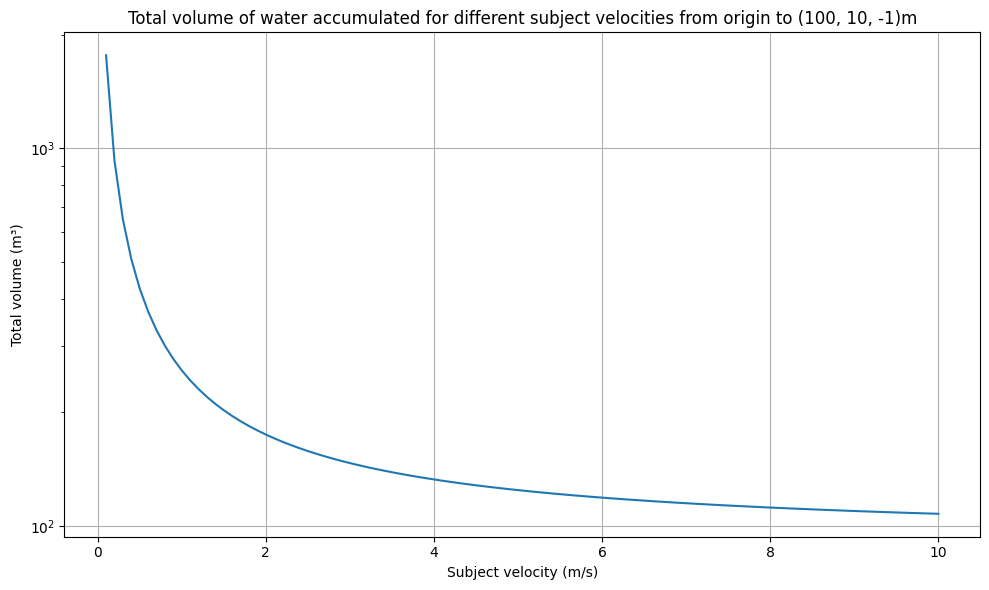

In [ ]:
# positive x direction is from left to right
# positive y direction is from bottom to top
# positive z direction is from back to front
import numpy as np
import matplotlib.pyplot as plt

# Subject dimension (more realistic depth)
Lx = 0.3 #m (width)
Ly = 1.8 #m (height)
Lz = 0.5 #m (depth/thickness)

# Distance to travel
ldx = 100  # m (primary travel distance along x-axis)
ldy = 10    # m (no net displacement in y)
ldz = -1    # m (no net displacement in z)


# --- Arrays for Plotting ---
points_count = 100

# Array for varying subject's velocity (Vs)
Vs = np.linspace(0.1, 10, points_count) # From 0.1 m/s (slow walk) to 10 m/s (sprint)

# Rain
Vrx = -1    # m/s (horizontal wind)
Vry = -1.5 # m/s (vertical rain)
Vrz = -1    # m/s (sideways rain/wind)


def calculate_water_accumulation(Lx_in, Ly_in, Lz_in, Vrx_in, Vry_in, Vrz_in, Vsx_in, Vsy_in, Vsz_in, ldx_in, ldy_in, ldz_in):
    """
    Calculate the total water accumulation when a subject moves through rain.
    Handles scalar or array inputs for velocity components.
    """
    _Vrx_in = np.asarray(Vrx_in)
    _Vry_in = np.asarray(Vry_in)
    _Vrz_in = np.asarray(Vrz_in)
    _Vsx_in = np.asarray(Vsx_in)
    _Vsy_in = np.asarray(Vsy_in)
    _Vsz_in = np.asarray(Vsz_in)

    water_accum_rate_x = np.abs((Ly_in * Lz_in) * (_Vrx_in - _Vsx_in)) # Exposed area is Ly*Lz for x-flux
    water_accum_rate_y = np.abs((Lx_in * Lz_in) * (_Vry_in - _Vsy_in)) # Exposed area is Lx*Lz for y-flux (top/bottom)
    water_accum_rate_z = np.abs((Lx_in * Ly_in) * (_Vrz_in - _Vsz_in)) # Exposed area is Lx*Ly for z-flux (not used in this scenario)

    print(f"water_accum_rate_x: {water_accum_rate_x}")
    print(f"water_accum_rate_y: {water_accum_rate_y}")
    print(f"water_accum_rate_z: {water_accum_rate_z}")

    # Determine the shape for time arrays based on input velocity arrays
    ref_shape_array = np.ones_like(_Vsx_in, dtype=float) # Default if Vsx is array
    if not isinstance(_Vsx_in, np.ndarray) or _Vsx_in.ndim == 0:
        if isinstance(_Vsy_in, np.ndarray) and _Vsy_in.ndim > 0:
            ref_shape_array = np.ones_like(_Vsy_in, dtype=float)
        elif isinstance(_Vsz_in, np.ndarray) and _Vsz_in.ndim > 0:
            ref_shape_array = np.ones_like(_Vsz_in, dtype=float)
        # If all velocities are scalar, ref_shape_array remains scalar-like (shape (), value 1.0)

    time_x = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldx_in != 0:
        vsx_is_zero = (_Vsx_in == 0)
        vsx_not_zero = ~vsx_is_zero
        # Ensure operations are element-wise if _Vsx_in is an array
        if np.isscalar(_Vsx_in):
            if vsx_not_zero: time_x = ldx_in / _Vsx_in
            else: time_x = np.inf
        else: # _Vsx_in is an array
            if np.any(vsx_not_zero): time_x[vsx_not_zero] = ldx_in / _Vsx_in[vsx_not_zero]
            if np.any(vsx_is_zero): time_x[vsx_is_zero] = np.inf
    
    time_y = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldy_in != 0:
        vsy_is_zero = (_Vsy_in == 0)
        vsy_not_zero = ~vsy_is_zero
        if np.isscalar(_Vsy_in):
            if vsy_not_zero: time_y = ldy_in / _Vsy_in
            else: time_y = np.inf
        else:
            if np.any(vsy_not_zero): time_y[vsy_not_zero] = ldy_in / _Vsy_in[vsy_not_zero]
            if np.any(vsy_is_zero): time_y[vsy_is_zero] = np.inf

    time_z = np.full_like(ref_shape_array, 0.0, dtype=float)
    if ldz_in != 0:
        vsz_is_zero = (_Vsz_in == 0)
        vsz_not_zero = ~vsz_is_zero
        if np.isscalar(_Vsz_in):
            if vsz_not_zero: time_z = ldz_in / _Vsz_in
            else: time_z = np.inf
        else:
            if np.any(vsz_not_zero): time_z[vsz_not_zero] = ldz_in / _Vsz_in[vsz_not_zero]
            if np.any(vsz_is_zero): time_z[vsz_is_zero] = np.inf
            
    time = np.maximum(time_x, np.maximum(time_y, time_z))
    
    water_accum_x = water_accum_rate_x * time
    water_accum_y = water_accum_rate_y * time
    water_accum_z = water_accum_rate_z * time # This will be zero if Vrz_in and Vsz_in are zero.
    
    total_water_accum = water_accum_x + water_accum_y + water_accum_z
    return total_water_accum

#plot
plt.figure(figsize=(10, 6))
plt.title(f'Total volume of water accumulated for different subject velocities from origin to ({ldx}, {ldy}, {ldz})m')
plt.ylabel('Total volume (m³)')
plt.xlabel('Subject velocity (m/s)')

#get x,y, z components of velocity for subject walking to ldx, ldy, ldz
d = np.sqrt(ldx**2 + ldy**2 + ldz**2)
Vsx = Vs * ldx / d
Vsy = Vs * ldy / d
Vsz = Vs * ldz / d

total_volume = calculate_water_accumulation(Lx, Ly, Lz, Vrx, Vry, Vrz, Vsx, Vsy, Vsz, ldx, ldy, ldz) # m³
print(f"Total volume: {total_volume}")
plt.semilogy(Vs, total_volume)
plt.grid()
plt.tight_layout()
plt.show()